<a href="https://colab.research.google.com/github/EvgenyBelov78/DA1/blob/main/Salaries_in_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
url='https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/Salaries.csv'

In [82]:
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [84]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [85]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [86]:
df['Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [87]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [88]:
df['Status'].value_counts() 

FT    22334
PT    15785
Name: Status, dtype: int64

In [89]:
df['Notes'].value_counts() 

Series([], Name: Notes, dtype: int64)

In [90]:
df[df.Status.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [91]:
df[df.EmployeeName.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [92]:
df[df.JobTitle.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [93]:
df[df.BasePay.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013,NaN,San Francisco,NaN
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013,NaN,San Francisco,NaN
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013,NaN,San Francisco,NaN
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013,NaN,San Francisco,NaN
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.0,10.67,10.67,2013,NaN,San Francisco,NaN
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013,NaN,San Francisco,NaN


In [94]:
df[(df['JobTitle'].str.lower().str.find('police')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')==-1)]['JobTitle'].value_counts()

Police Officer 3                           2421
Police Officer                             1476
Police Officer 2                           1141
POLICE OFFICER III                          779
Community Police Services Aide              559
POLICE OFFICER I                            467
POLICE OFFICER II                           361
AIRPORT POLICE SERVICES AIDE                187
Institutional Police Officer                 37
SENIOR POLICE COMMUNICATIONS DISPATCHER      24
INSTITUTIONAL POLICE OFFICER                 13
POLICE COMMUNICATIONS SHIFT SUPERVISOR        8
Institutional Police Sergeant                 6
Chief of Police                               3
POLICE SERVICES AIDE                          2
INSTITUTIONAL POLICE SERGEANT                 2
CHIEF OF POLICE                               1
INSTITUTIONAL POLICE LIEUTENANT               1
Police Services Aide                          1
Name: JobTitle, dtype: int64

In [95]:
df[(df['JobTitle'].str.lower().str.find('police')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')>-1)]['JobTitle'].value_counts()

SERGEANT III (POLICE DEPARTMENT)               295
INSPECTOR III, (POLICE DEPARTMENT)             162
LIEUTENANT III (POLICE DEPARTMENT)              98
Sergeant, (Police Department)                   38
CAPTAIN III (POLICE DEPARTMENT)                 37
SERGEANT II (POLICE DEPARTMENT)                 19
SERGEANT I (POLICE DEPARTMENT)                  17
ASSISTANT INSPECTOR II (POLICE DEPARTMENT)      10
ASSISTANT INSPECTOR III (POLICE DEPARTMENT)      9
COMMANDER III, (POLICE DEPARTMENT)               7
Inspector, (Police Department)                   6
DEPUTY CHIEF III (POLICE DEPARTMENT)             5
INSPECTOR II, (POLICE DEPARTMENT)                3
INSPECTOR, (POLICE DEPARTMENT)                   2
ASSISTANT INSPECTOR (POLICE DEPARTMENT)          1
LIEUTENANT I, (POLICE DEPARTMENT)                1
LIEUTENANT II (POLICE DEPARTMENT)                1
Lieutenant (Police Department)                   1
Name: JobTitle, dtype: int64

In [96]:
df.loc[df['JobTitle'].str.lower().str.find('police')>-1,['Dept']]='Police'

In [97]:
df[(df['JobTitle'].str.lower().str.find('medic')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')==-1)]['JobTitle'].value_counts()

EMT/Paramedic/Firefighter                       918
Medical Evaluations Assistant                   613
FIRE FIGHTER PARAMEDIC                          301
Medical Social Worker                           298
MEDICAL EVALUATIONS ASSISTANT                   165
Medical Records Clerk                           154
Medical Records Technician                      126
MEDICAL SOCIAL WORKER                            94
MEDICAL RECORDS CLERK                            52
MEDICAL RECORDS TECHNICIAN                       38
CAPTAIN, EMERGENCYCY MEDICAL SERVICES            24
Medical Records Tech Sprv                        18
Senior Medical Social Worker                     15
Medical Transcriber Typist                       13
Fire Rescue Paramedic                            12
Medical Social Work Supervisor                   10
MEDICAL EXAMINER'S INVESTIGATOR I                10
MEDICAL EXAMINER'S INVESTIGATOR II                8
FIRE RESCUE PARAMEDIC                             7
MEDICAL RECO

In [98]:
df[(df['JobTitle'].str.lower().str.find('medic')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')>-1)]['JobTitle'].value_counts()

MEDICAL STAFF SERVICES DEPARTMENT SPECIALIST    4
MEDICAL STAFF SERVICES DEPARTMENT ANALYST       2
Name: JobTitle, dtype: int64

In [99]:
df.loc[df['JobTitle'].str.lower().str.find('medicine')>-1,['Dept']]='Medicine'

In [100]:
df[(df['JobTitle'].str.lower().str.find('medicine')>-1)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept


In [101]:
df.loc[df['JobTitle'].str.lower().str.find('medical')>-1,['Dept']]='Medicine'

In [102]:
df[(df['JobTitle'].str.lower().str.find('fire')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')==-1)]['JobTitle'].value_counts()

Firefighter                                           2359
EMT/Paramedic/Firefighter                              918
FIREFIGHTER                                            794
Lieutenant, Fire Suppression                           572
FIRE FIGHTER PARAMEDIC                                 301
Captain, Fire Suppression                              211
Insp, Fire Dept                                         74
CAPTAIN, FIRE SUPPRESSION                               71
Battalion Chief, Fire Suppress                          65
Battlion Chief, Fire Suppressi                          36
Fire Safety Inspector 2                                 31
Lieut,Fire Prev                                         28
INSPECTOR, BUREAU OF FIRE PREVENTION AND PUBLIC SA      20
Fire Alarm Dispatcher                                   20
Asst Chf of Dept (Fire Dept)                            18
Pilot of Fire Boats                                     15
Capt,Fire Prev or Fire Invsgtn                          

In [103]:
df.loc[df['JobTitle'].str.lower().str.find('fire')>-1,['Dept']]='Fire'

In [104]:
df[df['Dept'].isna()]['JobTitle'].value_counts()

Transit Operator                     7036
Special Nurse                        4389
Registered Nurse                     3736
Public Svc Aide-Public Works         2518
Custodian                            2418
                                     ... 
MEDIA/SECURITY SYSTEMS SUPERVISOR       1
CHIEF MICROBIOLOGIST                    1
SENIOR MORGUE ATTENDANT                 1
COMMUNICATIONS DIRECTOR                 1
CHIEF NURSERY SPECIALIST                1
Name: JobTitle, Length: 2053, dtype: int64

In [105]:
df[df['Dept'].isna()]['JobTitle'].count()

132887

In [106]:
df[(df['Dept']=='Fire')&(df['Year']==2011)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,Fire
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,Fire
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN,Fire
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN,Fire
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.9,NaN,299494.17,299494.17,2011,NaN,San Francisco,NaN,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34790,34791,CHARLES JOHNSON,FIREFIGHTER,0.0,0.0,1966.11,NaN,1966.11,1966.11,2011,NaN,San Francisco,NaN,Fire
34927,34928,THOMAS LEEPER,FIRE FIGHTER PARAMEDIC,0.0,11.21,1707.63,NaN,1718.84,1718.84,2011,NaN,San Francisco,NaN,Fire
35811,35812,ROBERTO LUCHA,FIREFIGHTER,0.0,217.1,185.07,NaN,402.17,402.17,2011,NaN,San Francisco,NaN,Fire
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0.0,0.0,92.21,NaN,92.21,92.21,2011,NaN,San Francisco,NaN,Fire


In [107]:
df[df['BasePay'].isna()].sort_values('BasePay',ascending=False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013,NaN,San Francisco,NaN,NaN
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013,NaN,San Francisco,NaN,NaN
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013,NaN,San Francisco,NaN,NaN
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013,NaN,San Francisco,NaN,Police
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,NaN,San Francisco,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.0,10.67,10.67,2013,NaN,San Francisco,NaN,NaN
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013,NaN,San Francisco,NaN,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN,Police
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013,NaN,San Francisco,NaN,Police


In [108]:
df.groupby('EmployeeName')['EmployeeName'].count().sort_values(ascending=False)

EmployeeName
Kevin Lee             13
Steven Lee            11
William Wong          11
Richard Lee           11
John Chan              9
                      ..
JIMMY GU               1
JIMMY FORD             1
JIMMY DEL ROSARIO      1
JIMMY CHIN             1
KIMBERLY HIROSHIMA     1
Name: EmployeeName, Length: 110811, dtype: int64

In [109]:
df.groupby('Dept')['Dept'].count().sort_values(ascending=False)

Dept
Police      8201
Fire        5879
Medicine    1687
Name: Dept, dtype: int64

In [110]:
df[(df['Dept']!='NaN')&(df['BasePay']=='Not Provided')] 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN


In [111]:
df[(df['BasePay']=='Not Provided')] 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN


In [112]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
Dept                132887
dtype: int64

In [113]:
df[df['BasePay'].isna()]['Dept'].value_counts()

Police    24
Fire      21
Name: Dept, dtype: int64

In [114]:
df[(df['Dept']=='Police')&(df['BasePay'].isna())].count()

Id                  24
EmployeeName        24
JobTitle            24
BasePay              0
OvertimePay         24
OtherPay            24
Benefits            24
TotalPay            24
TotalPayBenefits    24
Year                24
Notes                0
Agency              24
Status               0
Dept                24
dtype: int64

In [115]:
df[(df['Dept']=='Fire')&(df['BasePay'].isna())].count()

Id                  21
EmployeeName        21
JobTitle            21
BasePay              0
OvertimePay         21
OtherPay            21
Benefits            21
TotalPay            21
TotalPayBenefits    21
Year                21
Notes                0
Agency              21
Status               0
Dept                21
dtype: int64

In [80]:
#df.dropna(subset=['BasePay'],inplace=True)

In [116]:
df.fillna(0)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011,0.0,San Francisco,0,0
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,0.0,San Francisco,0,Police
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,0.0,San Francisco,0,Police
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011,0.0,San Francisco,0,0
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,0.0,San Francisco,0,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,0.0,San Francisco,PT,0
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,0.0,San Francisco,0,0
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,0.0,San Francisco,0,0
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,0.0,San Francisco,0,0


In [117]:
df.groupby('Dept')['Dept'].count().sort_values(ascending=False)

Dept
Police      8201
Fire        5879
Medicine    1687
Name: Dept, dtype: int64

In [118]:
df=df.drop(df[df['BasePay']=='Not Provided'].index)

In [119]:
df[df['BasePay']=='Not Provided'] 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept


In [120]:
df.groupby('Dept')['Dept'].count().sort_values(ascending=False)

Dept
Police      8201
Fire        5879
Medicine    1687
Name: Dept, dtype: int64

In [121]:
df['BasePay']=df['BasePay'].astype(str).astype(float)

In [122]:
df['OvertimePay']=df['OvertimePay'].astype(str).astype(float)

In [123]:
df['OtherPay']=df['OtherPay'].astype(str).astype(float)

In [124]:
df['Benefits']=df['Benefits'].astype(str).astype(float)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148650 non-null  object 
 12  Status            38119 non-null   object 
 13  Dept              15767 non-null   object 
dtypes: float64(7), int64(2), object(5)
memory usage: 17.0+ MB


In [126]:
df.groupby(['Dept','Year'])['BasePay'].mean().sort_values(ascending=False)

Dept      Year
Fire      2013    116159.283273
          2012    109222.646825
          2014    108179.287505
          2011    106549.269212
Police    2011    105981.214773
          2013    102405.836515
          2012     96229.006186
          2014     93872.060295
Medicine  2011     57342.245104
          2014     56816.499521
          2013     55630.664871
          2012     53843.100992
Name: BasePay, dtype: float64

In [48]:
df.groupby(['Dept','Year'])['BasePay'].median().sort_values(ascending=False)

Dept      Year
Police    2013    118618.940
Fire      2013    116956.710
          2014    112703.720
Police    2014    112164.030
          2011    111976.140
          2012    111549.690
Fire      2012    110847.100
          2011    105934.670
Medicine  2014     60364.975
          2013     59834.000
          2012     56968.710
          2011     53822.610
Name: BasePay, dtype: float64

In [49]:
df.groupby(['Dept','Year'])['BasePay'].max().sort_values(ascending=False)

Dept      Year
Police    2013    319275.01
Fire      2013    313686.01
Police    2014    307450.04
          2012    302578.00
Fire      2014    302068.00
          2012    296943.01
          2011    285262.00
Medicine  2013    271831.50
          2014    268946.02
Police    2011    261717.60
Medicine  2011    257510.59
          2012    254878.82
Name: BasePay, dtype: float64

In [50]:
df.groupby(['Dept','Year'])['EmployeeName'].count()

Dept      Year
Fire      2011    1459
          2012    1449
          2013    1460
          2014    1511
Medicine  2011     431
          2012     393
          2013     425
          2014     438
Police    2011    2512
          2012    1919
          2013    1869
          2014    1901
Name: EmployeeName, dtype: int64

In [51]:
df.groupby(['Dept','Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


BasePay  OvertimePay     OtherPay     Benefits
Dept     Year                                                     
Fire     2011  1.554554e+08  31898485.78  24209396.38         0.00
         2012  1.582636e+08  40499542.12  22188183.55  52859030.29
         2013  1.671532e+08  43978891.99  23285316.11  56620946.76
         2014  1.634589e+08  38625129.76  22744834.21  60707949.89
Medicine 2011  2.471451e+07   1135499.38   1071479.57         0.00
         2012  2.116034e+07    516335.45    452732.20   9703275.84
         2013  2.364303e+07    520985.76    509491.75   9108516.82
         2014  2.488563e+07    544616.97    507614.43  10195686.16
Police   2011  2.662248e+08  22225776.17  30817507.53         0.00
         2012  1.846635e+08  24739129.82  13698860.23  57429170.22
         2013  1.889388e+08  24573767.45  16013826.61  59201909.16
         2014  1.784508e+08  26684074.32  15365391.86  61511276.28

In [ ]:
dfpolice=df[df['Dept']=='Police'].groupby(['Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
dffire=df[df['Dept']=='Fire'].groupby(['Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
dfmedicine=df[df['Dept']=='Medicine'].groupby(['Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
dfpolice

,BasePay,OvertimePay,OtherPay,Benefits
Year,,,,
2011,2.662248e+08,22225776.17,30817507.53,0.00
2012,1.846635e+08,24739129.82,13698860.23,57429170.22
2013,1.889388e+08,24573767.45,15642567.66,59106443.82
2014,1.784508e+08,26684074.32,15365391.86,61511276.28


In [ ]:
dfpolice.reset_index(drop= False, inplace = True)

In [ ]:
dfmedicine

,BasePay,OvertimePay,OtherPay,Benefits
Year,,,,
2011,24714507.64,1135499.38,1071479.57,0.00
2012,21160338.69,516335.45,452732.20,9703275.84
2013,23643032.57,520985.76,509491.75,9108516.82
2014,24885626.79,544616.97,507614.43,10195686.16


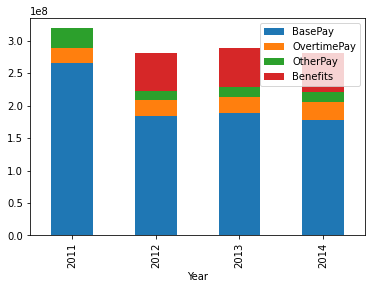

In [ ]:
dfpolice.set_index('Year').plot(kind='bar',stacked= True )

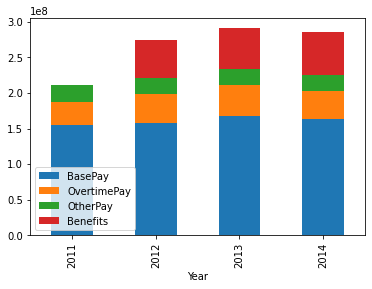

In [ ]:
dffire.plot(kind='bar',stacked= True )

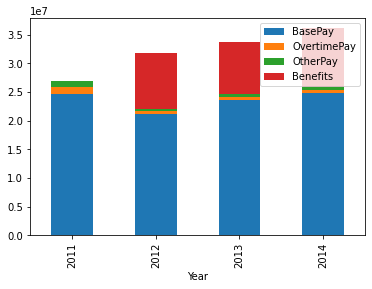

In [ ]:
dfmedicine.plot(kind='bar',stacked= True )

In [ ]:
df['Summa']=df['BasePay']+df["OvertimePay"]+df["OtherPay"]+df['Benefits']

In [ ]:
df.loc[df.Benefits.isna(),'Benefits']=0

In [ ]:
df[df['Benefits'].isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept,Summa


In [ ]:
df.groupby(['Year'])['Summa'].sum()

Year
2011    2.594195e+09
2012    3.696940e+09
2013    3.808882e+09
2014    3.821866e+09
Name: Summa, dtype: float64

In [ ]:
dfbudget=df.groupby(['Dept','Year'])['Summa'].sum()

In [ ]:
dfbudget

Dept      Year
Fire      2011    2.115633e+08
          2012    2.738104e+08
          2013    2.906735e+08
          2014    2.855368e+08
Medicine  2011    2.692149e+07
          2012    3.183268e+07
          2013    3.378203e+07
          2014    3.613354e+07
Police    2011    3.192681e+08
          2012    2.805306e+08
          2013    2.882615e+08
          2014    2.820115e+08
Name: Summa, dtype: float64

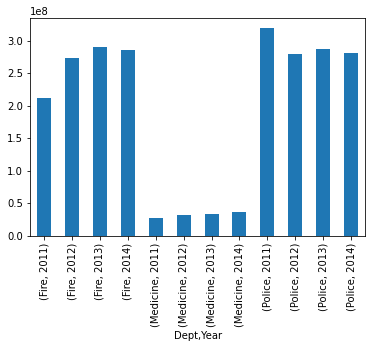

In [ ]:
dfbudget.plot(kind='bar',stacked= True )

In [ ]:
import psycopg2
import sqlite3

In [ ]:
DB_HOST = '178.170.196.15'
DB_USER = 'student4'
DB_USER_PASSWORD = 'student4_password'
DB_NAME = 'sql_ex_for_student4'
conn=psycopg2.connect(host=DB_HOST,user=DB_USER,password=DB_USER_PASSWORD,dbname=DB_NAME)

In [ ]:
conn.autocommit = True
cursor = conn.cursor()
  
# drop table if it already exists
cursor.execute('drop table if exists sfsalaries')
  
sql = '''CREATE TABLE sfsalaries(Id int,	EmployeeName char(100),	JobTitle char(100),	BasePay char(100),	OvertimePay char(100),	OtherPay char(100),	Benefits char(100),	TotalPay char(100),	TotalPayBenefits char(100),	Year char(100),	Notes char(100),	Agency char(100),	Status char(100),	Dept char(100));'''
  
cursor.execute(sql)

In [ ]:
df.to_sql('sfsalaries', conn, if_exists= 'replace')

DatabaseError: ignored

In [ ]:
year=2015
dffull=pd.DataFrame()

In [ ]:
dffull

""


In [ ]:
while year!=2022:
  url=f'https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-'+str(year)+'.csv'
  print(url)
  d=pd.read_csv(url)
  dffull=pd.concat([dffull,d])
  year+=1

https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2015.csv
https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2016.csv
https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2017.csv
https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2018.csv
https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2019.csv
https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2020.csv
https://raw.githubusercontent.com/EvgenyBelov78/DA1/main/san-francisco-2021.csv


In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
dffull = dffull.drop('Pension Debt', axis=1)

In [ ]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148049 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          112495 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            148654 non-null  object 
 11  Status            38119 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 13.6+ MB


In [ ]:
dffull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289407 entries, 0 to 39705
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Employee Name         289407 non-null  object 
 1   Job Title             289407 non-null  object 
 2   Base Pay              289407 non-null  float64
 3   Overtime Pay          289407 non-null  float64
 4   Other Pay             289407 non-null  float64
 5   Benefits              289407 non-null  float64
 6   Total Pay             289407 non-null  float64
 7   Total Pay & Benefits  289407 non-null  float64
 8   Year                  289407 non-null  int64  
 9   Notes                 0 non-null       float64
 10  Agency                289407 non-null  object 
 11  Status                207493 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 28.7+ MB


In [ ]:
dffull=dffull.rename(columns = {'Employee Name':'EmployeeName', 'Job Title':'JobTitle' ,'Base Pay':'BasePay','Overtime Pay':'OvertimePay','Other Pay':'OtherPay'})

In [ ]:
dffull=dffull.rename(columns = {'Total Pay':'TotalPay', 'Total Pay & Benefits':'TotalPayBenefits'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148049 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          112495 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            148654 non-null  object 
 11  Status            38119 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 13.6+ MB


In [ ]:
dffull=pd.concat([dffull,df],ignore_index=True)

In [ ]:
dffull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438061 entries, 0 to 438060
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      438061 non-null  object 
 1   JobTitle          438061 non-null  object 
 2   BasePay           437456 non-null  object 
 3   OvertimePay       438061 non-null  object 
 4   OtherPay          438061 non-null  object 
 5   Benefits          401902 non-null  object 
 6   TotalPay          438061 non-null  float64
 7   TotalPayBenefits  438061 non-null  float64
 8   Year              438061 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            438061 non-null  object 
 11  Status            245612 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 40.1+ MB


In [ ]:
df_lin=dffull.groupby('Year').sum()

In [ ]:
df_lin.reset_index(inplace=True)

In [ ]:
df_lin

,Year,TotalPay,TotalPayBenefits,Notes
0,2011,2.594195e+09,2.594195e+09,0.0
1,2012,2.724848e+09,3.696940e+09,0.0
2,2013,2.918656e+09,3.814772e+09,0.0
3,2014,2.876911e+09,3.821866e+09,0.0
4,2015,3.052818e+09,4.006678e+09,0.0
5,2016,3.298624e+09,4.284702e+09,0.0
6,2017,3.501297e+09,4.558521e+09,0.0
7,2018,3.688579e+09,4.800987e+09,0.0
8,2019,3.909399e+09,5.118203e+09,0.0
9,2020,3.963517e+09,5.264676e+09,0.0


In [ ]:
df_lin['Year'].apply(lambda x: int(x))

0     2011
1     2012
2     2013
3     2014
4     2015
5     2016
6     2017
7     2018
8     2019
9     2020
10    2021
Name: Year, dtype: int64

In [ ]:
len(df_lin)

11

In [ ]:
i=0

In [ ]:
while i<len(df_lin):
 if (df_lin['Year'][i] % 4 != 0):
    df_lin['Notes'][i]='365'
 else: df_lin['Notes'][i]='366'
 i+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_lin

,Year,TotalPay,TotalPayBenefits,Notes
0,2011,2.594195e+09,2.594195e+09,365.0
1,2012,2.724848e+09,3.696940e+09,366.0
2,2013,2.918656e+09,3.814772e+09,365.0
3,2014,2.876911e+09,3.821866e+09,365.0
4,2015,3.052818e+09,4.006678e+09,365.0
5,2016,3.298624e+09,4.284702e+09,366.0
6,2017,3.501297e+09,4.558521e+09,365.0
7,2018,3.688579e+09,4.800987e+09,365.0
8,2019,3.909399e+09,5.118203e+09,365.0
9,2020,3.963517e+09,5.264676e+09,366.0


In [ ]:
df_lin.drop('TotalPay',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
lr_full = LinearRegression()
lr = LinearRegression()

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(df_lin.drop('TotalPayBenefits',axis=1),
                                                  df_lin.TotalPayBenefits,
                                                  shuffle = False,
                                                  test_size = 0.20)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
print('Ошибка на Train',round(mean_absolute_error(y_train, lr.predict(X_train)),2))

Ошибка на Train 156173176.3


In [ ]:
print('Ошибка на Test',round(mean_absolute_error(y_test, lr.predict(X_test)),2))

Ошибка на Test 157712398.45


In [ ]:
df_lin2 = df_lin.tail(1).copy()
df_lin2.reset_index( inplace = True , drop=True)

In [ ]:
df_lin2['TotalPayBenefits']=''
df_lin2['Year']=2022
df_lin2['Notes']=365

In [ ]:
df_lin_copy=df_lin

In [ ]:
df_lin=pd.concat([df_lin,df_lin2], ignore_index=True)

In [ ]:
df_lin

,Year,TotalPayBenefits,Notes
0,2011,2594195051.88,365.0
1,2012,3696940025.96,366.0
2,2013,3814772184.37,365.0
3,2014,3821865780.6,365.0
4,2015,4006678414.7,365.0
5,2016,4284701637.05,366.0
6,2017,4558520865.66,365.0
7,2018,4800986845.93,365.0
8,2019,5118202868.42,365.0
9,2020,5264675807.79,366.0


In [ ]:
lr_full.fit(df_lin_copy.drop('TotalPayBenefits',axis=1),df_lin_copy.TotalPayBenefits)

LinearRegression()

In [ ]:
print('Предсказание на 2022 год - ',lr.predict(df_lin.drop('TotalPayBenefits',axis=1).tail(1))[0])

Предсказание на 2022 год -  5837079911.011108


In [ ]:
print('Предсказание на 2022 год, модель видела весь датасет - ',lr_full.predict(df_lin_copy.drop('TotalPayBenefits',axis=1).tail(1))[0])

Предсказание на 2022 год, модель видела весь датасет -  5496072736.669861
